# Email Network Analysis

**Project Overview:**  
This project analyzes a real-world organizational email network using Python and NetworkX.  
The dataset contains **1,005 people (nodes)** and **25,571 email interactions (edges)**.

---

## Dataset

- **Source:** SNAP (Stanford Network Analysis Project)  
- **File:** `email-Eu-core.mtx`  
- **Format:** Matrix Market `.mtx` (sparse matrix format)  

### How the dataset works:
- **Node:** Each person in the organization  
- **Edge:** An email sent from one person to another  
- **Directed Graph:** Edges have direction (from sender → receiver)

**Example:**
- 0 1 # Person 0 sent email to Person 1
- 1 2 # Person 1 sent email to Person 2
- 2 0 # Person 2 sent email to Person 0


In [15]:
pip install pandas networkx matplotlib


Note: you may need to restart the kernel to use updated packages.


In [16]:
import networkx as nx
from scipy.io import mmread

matrix = mmread(r"archive\email-Eu-core.mtx")

G = nx.from_scipy_sparse_array(matrix, create_using=nx.DiGraph)

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())


Number of nodes: 1005
Number of edges: 25571


Explanation:

DiGraph → ensures the network is directed (emails have a sender and receiver)

from_scipy_sparse_array → converts matrix to a NetworkX graph

---

# Degree Centrality

Definition:

Measures the number of connections per node.

In-degree: Number of emails received

Out-degree: Number of emails sent

Importance:

Identifies the most active or popular communicators in the network

In [17]:
# Degree Centrality
in_degree = dict(G.in_degree())
out_degree = dict(G.out_degree())

top_in = sorted(in_degree.items(), key=lambda x: x[1], reverse=True)[:5]

top_out = sorted(out_degree.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 receivers (In-degree):", top_in)
print("Top 5 senders (Out-degree):", top_out)


Top 5 receivers (In-degree): [(160, 212), (62, 179), (107, 169), (121, 157), (86, 154)]
Top 5 senders (Out-degree): [(160, 334), (82, 227), (121, 222), (107, 204), (86, 202)]


In [4]:
betweenness = nx.betweenness_centrality(G)
top_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 strategic connectors (Betweenness):", top_betweenness)


Top 5 strategic connectors (Betweenness): [(160, 0.07212078608028885), (86, 0.03743291212218476), (5, 0.026984804243671952), (121, 0.02453210288950872), (62, 0.024511105581801345)]


# Density

Definition:

Measures how connected the network is.

Range: 0 (low connectivity) → 1 (fully connected)

Importance:

Shows how efficiently communication flows across the organization.

In [5]:
density = nx.density(G)
print("Network Density:", density)


Network Density: 0.025342411448732432



# Network Graph (first 50 nodes)

Shows a subgraph of first 50 nodes for clarity

Each node = person, each edge = email

Node color = blue, edges = gray, size = 500 for visibility

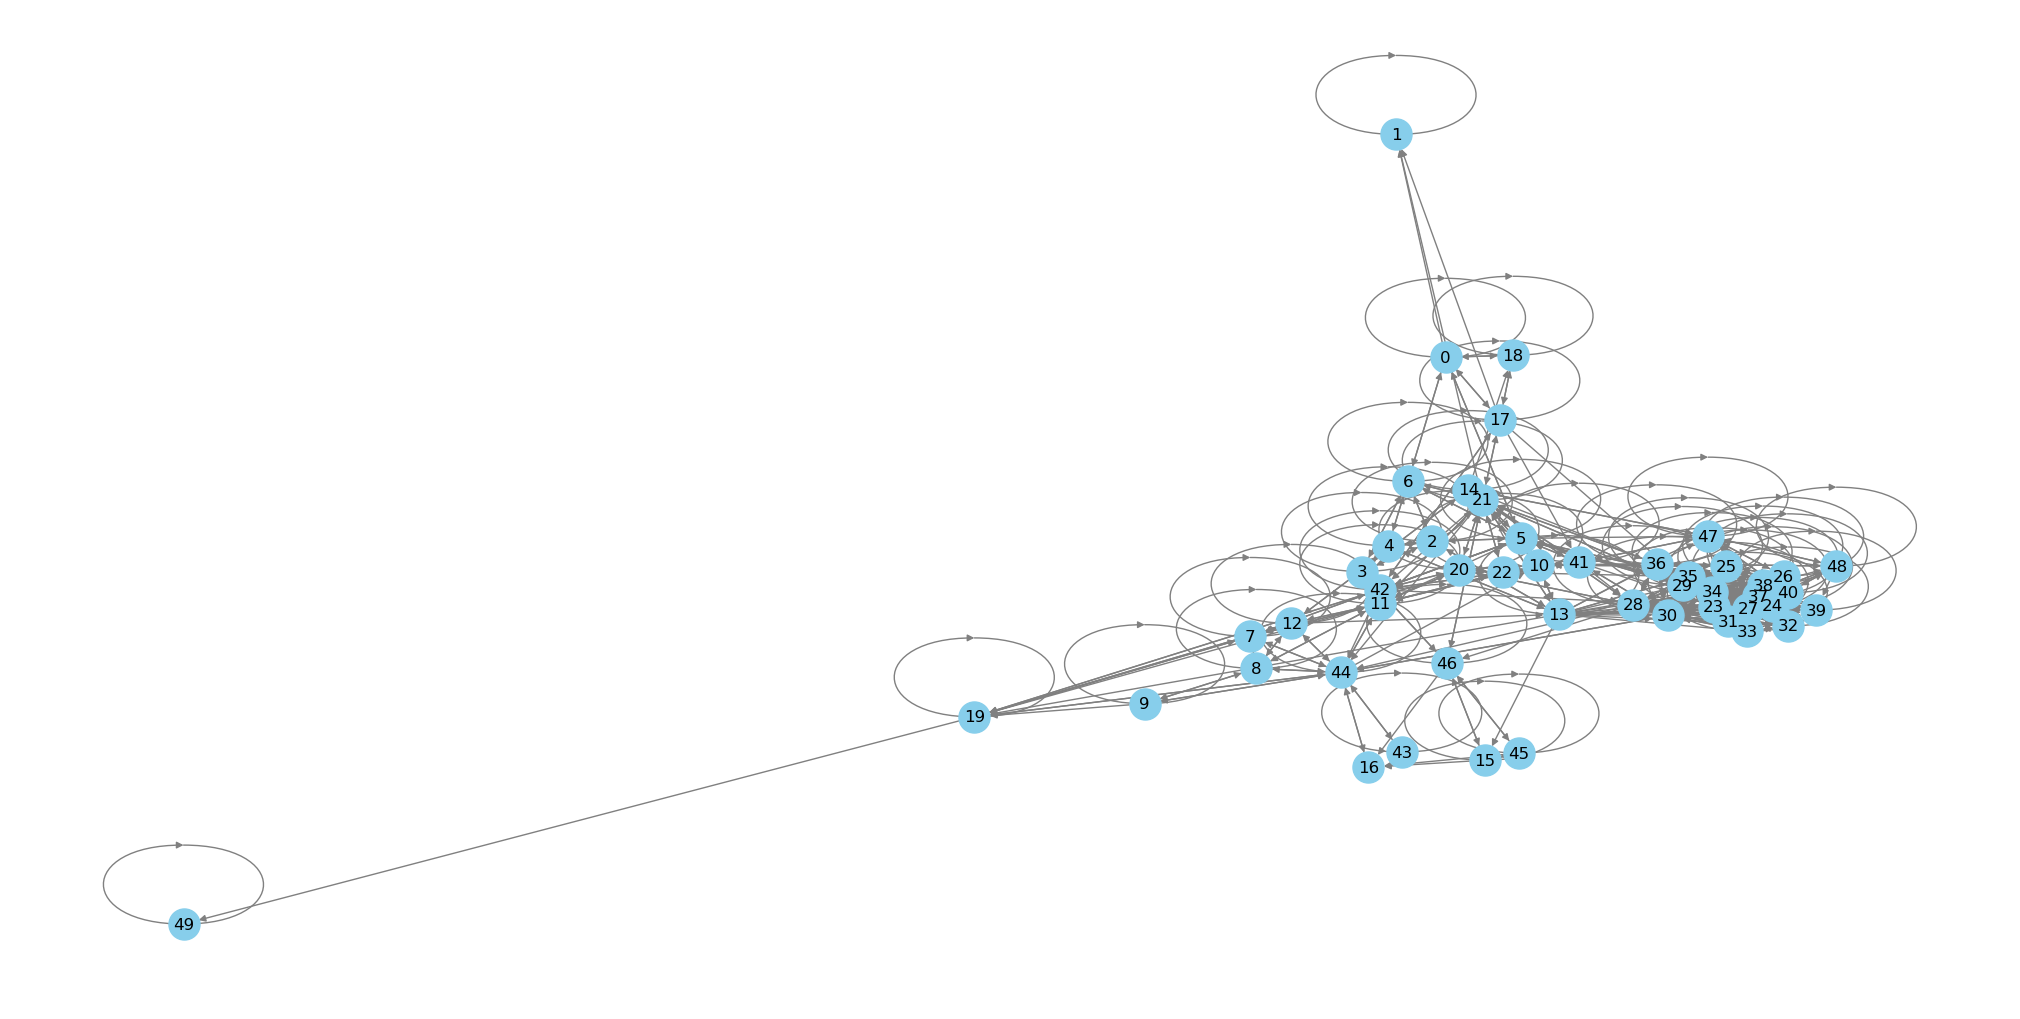

In [ ]:
import matplotlib.pyplot as plt

sub_nodes = list(G.nodes())[:50]
G_small = G.subgraph(sub_nodes)

plt.figure(figsize=(20,10))
nx.draw(G_small, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray")
plt.show()


# Network Graph (Node size = degree, color = activity)



Explanation:

Displays a subgraph of the first 50 nodes

Node size corresponds to how connected each person is (degree centrality)

Node color shows activity level (lighter = less active, darker = more active)

Edges are gray to show connections clearly

Figure size is wide (20x10) for better visibility

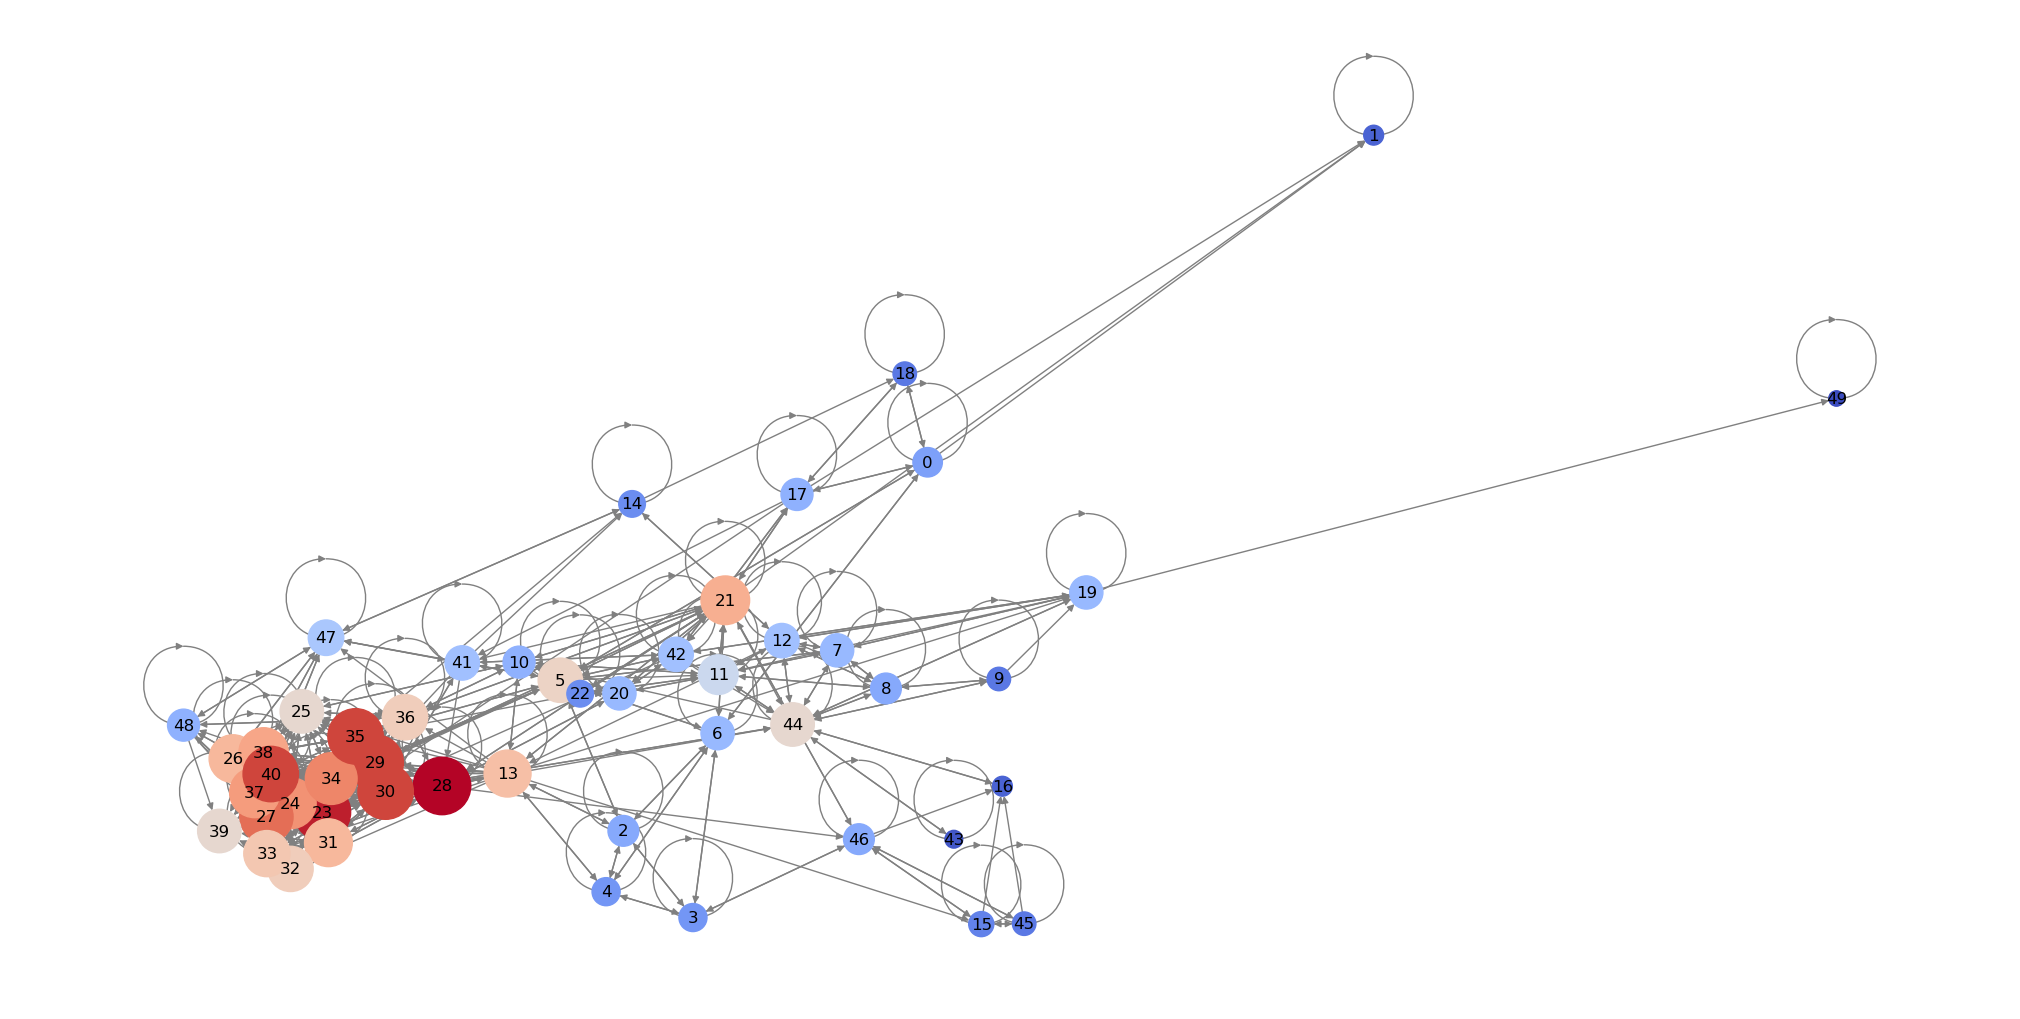

In [18]:
import matplotlib.pyplot as plt

sub_nodes = list(G.nodes())[:50]
G_small = G.subgraph(sub_nodes)

#degree centrality
deg_centrality = nx.degree_centrality(G_small)

plt.figure(figsize=(20,10))
nx.draw(
    G_small,
    with_labels=True,
    node_size=[v*2000 for v in deg_centrality.values()],  # node size / degree
    node_color=list(deg_centrality.values()),  # color / activity
    cmap=plt.cm.coolwarm,
    edge_color="gray"
)
plt.show()


---

## Conclusion

In this project, I analyzed a real-world organizational email network with **1,005 nodes and 25,571 email interactions** using Python and NetworkX.  
I identified the most active communicators, strategic connectors, and overall network density.  
Additionally, I visualized the network through **Network Graphs, Bar Charts, Histograms, and Community Detection**, providing clear insights into the structure and communication patterns of the organization.

**Author:** Lilian Alhalabi
